# IMPORT MODULES REQUIRED TO PROCESS THE DATA

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv(r"./input/attacks.csv", encoding = "latin-1")
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


# CHECKING THE COLUMNS TO ASSESS THE DATA

In [3]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

# LOOKING AT AMOUNT OF NaN VALUES AMONG THE DIFFERENT COLUMNS

In [4]:
df.shape

(25723, 24)

In [5]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 22               25722
Unnamed: 23               25721
Time                      22775
Species                   22259
Age                       22252
Sex                       19986
Activity                  19965
Location                  19961
Fatal (Y/N)               19960
Area                      19876
Name                      19631
Country                   19471
Injury                    19449
Investigator or Source    19438
Type                      19425
Year                      19423
href formula              19422
pdf                       19421
href                      19421
Case Number.1             19421
Case Number.2             19421
Date                      19421
original order            19414
Case Number               17021
dtype: int64

# REMOVAL OF ROWS FULL OF NaN VALUES

In [6]:
no_empty_rows = df.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False)
no_empty_rows

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
display(no_empty_rows.isnull().sum().sort_values(ascending=False))
no_empty_rows['Case Number'].value_counts()

Unnamed: 22               8702
Unnamed: 23               8701
Time                      5755
Species                   5239
Age                       5232
Sex                       2966
Activity                  2945
Location                  2941
Fatal (Y/N)               2940
Area                      2856
Name                      2611
Country                   2451
Injury                    2429
Investigator or Source    2418
Type                      2405
Year                      2403
href formula              2402
pdf                       2401
href                      2401
Case Number.1             2401
Case Number.2             2401
Date                      2401
original order            2394
Case Number                  1
dtype: int64

0               2400
1983.06.15         2
1923.00.00.a       2
1990.05.10         2
1907.10.16.R       2
                ... 
1988.04.14.b       1
2012.03.24         1
2000.07.15.b       1
1960.04.00.b       1
1882.01.05.R       1
Name: Case Number, Length: 6287, dtype: int64

# DROPING COLUMNS WITH DUPLICATE OR IRRELEVANT INFORMATION

In [8]:
relevant_data_mispelled = no_empty_rows.drop(['Case Number','Year', 'pdf','href formula','href','Case Number.1','Case Number.2','Unnamed: 22', 'Unnamed: 23','original order'], axis=1)
print('\n\nDataFrame after deleting rows full of NaN values\n--------------')
relevant_data_mispelled



DataFrame after deleting rows full of NaN values
--------------


,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,25-Jun-2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,18-Jun-2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,09-Jun-2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,04-Jun-2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# RENAMING MISPELLED COLUMNS

In [9]:
display('Species and Sex have an extra whitespace',relevant_data_mispelled.columns)
relevant_data = relevant_data_mispelled.rename(columns={"Species ": "Species","Sex ": "Sex"})
display('Species and Sex have the whitespace removed',relevant_data.columns)

'Species and Sex have an extra whitespace'

Index(['Date', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name',
       'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Investigator or Source'],
      dtype='object')

'Species and Sex have the whitespace removed'

Index(['Date', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name',
       'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species',
       'Investigator or Source'],
      dtype='object')

# EXTRACTING MM/YY FORMAT FROM DATE

In [10]:
relevant_data.Date.value_counts()
relevant_data

,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,25-Jun-2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,18-Jun-2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,09-Jun-2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,04-Jun-2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#A list is created to hold the values of the findall(), from which we will create a DataFrame to concatenate with the working DataFrame

In [12]:
list_date = list(relevant_data['Date'])

In [13]:
updated = {}

In [14]:
relevant_data['Date'] = relevant_data.Date.fillna("")
updated['Tracked_date'] = []

for e in list_date:
    #print(e)
    #print(str(e))
    #separation = re.findall(r'\w+',e)
    #print(separation)
    monthyear = re.findall(r"[A-Z]{1}\w{2}[-\s]?\d{4}", str(e))
    #print(monthyear)
    if monthyear:
        updated['Tracked_date'].append(monthyear[0]) 
    else:
        updated['Tracked_date'].append('')

updated['Tracked_date']


['Jun-2018',
 'Jun-2018',
 'Jun-2018',
 'Jun-2018',
 'Jun-2018',
 'Jun-2018',
 'Jun-2018',
 'May-2018',
 'May-2018',
 'May-2018',
 'May-2018',
 'May-2018',
 'May-2018',
 'May-2018',
 'May 2018',
 'May-2018',
 'May-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Apr-2018',
 'Mar-2018',
 'Mar-2018',
 'Mar-2018',
 'Mar-2018',
 'Feb-2018',
 'Feb-2018',
 'Feb-2018',
 'Feb-2018',
 'Feb-2018',
 'Feb-2018',
 'Feb-2018',
 'Feb-2018',
 'Jan-2018',
 'Jan-2018',
 'Jan-2018',
 'Jan-2018',
 'Jan-2018',
 'Jan-2018',
 'Dec-2017',
 'Dec-2017',
 'Dec-2017',
 'Dec-2017',
 'Nov-2017',
 'Nov-2017',
 'Nov-2017',
 'Nov-2017',
 'Nov-2017',
 'Nov-2017',
 'Nov-2017',
 'Nov-2017',
 'Oct-2017',
 'Oct-2017',
 'Oct-2017',
 'Oct-2017',
 'Oct-2017',
 'Oct-2017',
 'Oct-2017',
 'Oct-2017',
 'Oct-2017',
 'Oct-2017',
 'Oct-2017',
 'Oct-2017',

In [15]:
df_Tracked_date = pd.DataFrame(updated)

In [16]:
relevant_data_v1 = pd.concat([df_Tracked_date,relevant_data], axis=1)
relevant_data_v1

,Tracked_date,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,Jun-2018,25-Jun-2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,Jun-2018,18-Jun-2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,Jun-2018,09-Jun-2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,Jun-2018,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,Jun-2018,04-Jun-2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# WE SPLIT THE MM/YY FORMAT IN TWO SEPARATE COLUMNS

In [17]:
relevant_data_v1['Tracked_date'] = relevant_data_v1.Tracked_date.fillna("")
list_day_month = list(relevant_data_v1['Tracked_date'])

In [18]:
update_year= {}
update_month = {}

In [19]:
update_year['Year'] = []
update_month['Month'] = []

In [20]:
for e in list_day_month:
    #print(e)
    #print(str(e))
    division = re.split('[-\s]',str(e))
    #print(division)
    month = re.findall(r"[A-Z]{1}\w{2}", str(e))
    #print(month)
    year = re.findall(r"\d{4}", str(e))
    if division == ['']:
        update_month['Month'].append('')
        update_year['Year'].append('')
    else:
        update_month['Month'].append(month[0])
        update_year['Year'].append(year[0])
        
        
display(update_year['Year'])
display(update_month['Month'])

['2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 

['Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'Jun',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'May',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Apr',
 'Mar',
 'Mar',
 'Mar',
 'Mar',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Feb',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Jan',
 'Dec',
 'Dec',
 'Dec',
 'Dec',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Nov',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Oct',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Sep',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Aug',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',
 'Jul',


In [21]:
df_Month = pd.DataFrame(update_month)
df_Year = pd.DataFrame(update_year)
relevant_data_v2 = pd.concat([df_Month,df_Year,relevant_data_v1], axis=1)
relevant_data_v2


,Month,Year,Tracked_date,Date,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,Jun,2018,Jun-2018,25-Jun-2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,Jun,2018,Jun-2018,18-Jun-2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,Jun,2018,Jun-2018,09-Jun-2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,Jun,2018,Jun-2018,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,Jun,2018,Jun-2018,04-Jun-2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8700,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8703,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# WE DROP PREVIOUS DATE COLUMNS AND GET RID OF ROWS THAT ARE COMPLETELY FULL OF NaN VALUES

In [22]:
relevant_data_v3 = relevant_data_v2.drop(['Tracked_date','Date'], axis=1)
print('\n\nDataFrame after deleting columns with previous Date values\n--------------')
relevant_data_v3



DataFrame after deleting columns with previous Date values
--------------


,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,Jun,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,Jun,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,Jun,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,Jun,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,Jun,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8700,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8703,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# We add NaN values to the empty row values for month and year and drop rows full of NaN values that match those of the columns

In [24]:
for i in relevant_data_v3.columns:
    relevant_data_v3[i][relevant_data_v3[i].apply(lambda i: True if re.search('^\s*$', str(i)) else False)]= np.NaN
relevant_data_v3

,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,Jun,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,Jun,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,Jun,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,Jun,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,Jun,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
relevant_data_v4 = relevant_data_v3.dropna(subset=['Month','Year'])
relevant_data_v4

,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,Jun,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,Jun,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,Jun,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,Jun,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,Jun,2018,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6246,Apr,1959,Unprovoked,BERMUDA,Paget,Paget Parish,Spearfishing,Ross Doe,M,NaN,Shoulder abraded by skin of shark,N,NaN,NaN,Mentioned in letter from L. S. Mowbray dated 4...
6257,Mar,1956,Unprovoked,NORTH PACIFIC OCEAN,NaN,Wake Island,"Fishing, wading with string of fish",male,M,NaN,Survived,N,NaN,NaN,"J. Oetzel, Skin Diver Magazine, March 1956, p.19"
6288,Jul,1916,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,NaN,"""Lost leg""",N,NaN,NaN,"C. Creswell, GSAF; Wilmington Star, 7/17/1916"
6289,Jul,1913,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Fishing,a native fisherman,M,NaN,"FATAL, body not recovered but shark was caught...",Y,NaN,NaN,"Rural New Yorker, 7/19/1913"


# WE COUNT THE ATTACKS PER COUNTRY AND KEEP THOSE WITH MORE THAN 100 INSTANCES

In [26]:
attacks_per_country = relevant_data_v4['Country'].value_counts()
attacks_per_country

USA                         2123
AUSTRALIA                   1270
SOUTH AFRICA                 545
NEW ZEALAND                  119
BRAZIL                       111
                            ... 
RED SEA / INDIAN OCEAN         1
Between PORTUGAL & INDIA       1
PERU                           1
NORTH SEA                      1
BRITISH WEST INDIES            1
Name: Country, Length: 189, dtype: int64

In [27]:
countries_study = attacks_per_country.where(attacks_per_country>100).dropna().index.values
print(countries_study)

['USA' 'AUSTRALIA' 'SOUTH AFRICA' 'NEW ZEALAND' 'BRAZIL']


# WE CREATE A DATAFRAME WITH THE VALUES FROM THE SELECTED COUNTRIES AND DROP THE REST OF THE VALUES

In [28]:
countries_more_hundred = relevant_data_v4['Country'].isin(countries_study)


In [29]:
relevant_data_v5 = relevant_data_v4.where(countries_more_hundred)
relevant_data_v5

,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,Jun,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,Jun,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,Jun,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,Jun,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6288,Jul,1916,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,NaN,"""Lost leg""",N,NaN,NaN,"C. Creswell, GSAF; Wilmington Star, 7/17/1916"
6289,Jul,1913,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Fishing,a native fisherman,M,NaN,"FATAL, body not recovered but shark was caught...",Y,NaN,NaN,"Rural New Yorker, 7/19/1913"


In [30]:
relevant_data_v6 = relevant_data_v5.dropna(axis=0, how='all', thresh=None, subset=None, inplace=False)
relevant_data_v6

,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source
0,Jun,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF"
1,Jun,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com"
2,Jun,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com"
3,Jun,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF"
5,Jun,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,Jan,1967,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Keiskamma River mouth,Crossing river on a raft,Sinsa,M,NaN,"FATAL, leg severed",Y,NaN,NaN,"Whitaker, The Sun, 1/3/1967"
6245,Jun,1959,Unprovoked,USA,California,"Capistrano, Orange County",NaN,girl,F,NaN,Leg injured,N,NaN,"White shark, 1,900-lb","B. Walton, Sun (San Bernardino), 6/19/1959"
6288,Jul,1916,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,NaN,"""Lost leg""",N,NaN,NaN,"C. Creswell, GSAF; Wilmington Star, 7/17/1916"
6289,Jul,1913,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Fishing,a native fisherman,M,NaN,"FATAL, body not recovered but shark was caught...",Y,NaN,NaN,"Rural New Yorker, 7/19/1913"


# WE CREATE A COLUMN WITH THE HEMISPHERE TO WHICH THE COUNTRIES BELONG

In [31]:
relevant_data_v6['Hemisphere'] = np.where(relevant_data_v6['Country'] == 'USA','N','S')

<ipython-input-31-684ecd145e9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data_v6['Hemisphere'] = np.where(relevant_data_v6['Country'] == 'USA','N','S')


In [32]:
relevant_data_v6

,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Hemisphere
0,Jun,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",N
1,Jun,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",N
2,Jun,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",N
3,Jun,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",S
5,Jun,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,Jan,1967,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Keiskamma River mouth,Crossing river on a raft,Sinsa,M,NaN,"FATAL, leg severed",Y,NaN,NaN,"Whitaker, The Sun, 1/3/1967",S
6245,Jun,1959,Unprovoked,USA,California,"Capistrano, Orange County",NaN,girl,F,NaN,Leg injured,N,NaN,"White shark, 1,900-lb","B. Walton, Sun (San Bernardino), 6/19/1959",N
6288,Jul,1916,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,NaN,"""Lost leg""",N,NaN,NaN,"C. Creswell, GSAF; Wilmington Star, 7/17/1916",N
6289,Jul,1913,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Fishing,a native fisherman,M,NaN,"FATAL, body not recovered but shark was caught...",Y,NaN,NaN,"Rural New Yorker, 7/19/1913",S


In [33]:
for e in relevant_data_v6['Month']:
    print(e)


Jun
Jun
Jun
Jun
Jun
Jun
May
May
May
May
May
May
May
May
May
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Mar
Mar
Mar
Mar
Feb
Feb
Feb
Feb
Feb
Feb
Feb
Jan
Jan
Jan
Jan
Jan
Dec
Dec
Nov
Nov
Nov
Oct
Oct
Oct
Oct
Oct
Oct
Oct
Oct
Oct
Oct
Oct
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Aug
Aug
Aug
Aug
Aug
Aug
Aug
Jul
Jul
Jul
Jul
Jul
Jul
Jul
Jul
Jul
Jul
Jul
Jul
Jul
Jun
Jun
Jun
Jun
Jun
Jun
Jun
Jun
May
May
May
May
May
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Apr
Mar
Mar
Mar
Feb
Feb
Feb
Feb
Feb
Feb
Feb
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Dec
Dec
Dec
Dec
Dec
Dec
Dec
Nov
Nov
Oct
Oct
Oct
Oct
Oct
Oct
Oct
Oct
Oct
Oct
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Sep
Aug
Aug
Aug
Aug
Aug
Jul
Jul
Jul
Jul
Jul
Jul
Jul
Jul
Jul
Jul
Jul
Jul
Jul
Jul
Jul
Jun
Jun
Jun
Jun
Jun
Jun
Jun
Jun
Jun
Jun
Jun
Jun
Jun
May
May
May
May
May
May
May
May
May
May
Apr
Apr
Apr
Apr
Apr
Apr
Mar
Mar
Mar
Mar
Mar
Mar
Mar
Mar
Mar
Feb
Feb
Feb
Feb
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Dec
Dec
Dec
Dec


Mar
Feb
Feb
Jan
Jan
Dec
Dec
Dec
Dec
Dec
Dec
Nov
Nov
Oct
Sep
Sep
Aug
Aug
Jul
Jul
Jul
Jun
Apr
Apr
Apr
Apr
Mar
Mar
Mar
Feb
Feb
Feb
Feb
Feb
Dec
Dec
Dec
Nov
Nov
Nov
Oct
Sep
Sep
Aug
Aug
Aug
Aug
Jul
Jul
Jun
May
May
Mar
Mar
Mar
Mar
Mar
Jan
Jan
Jan
Dec
Dec
Dec
Dec
Sep
Sep
Sep
Sep
Sep
Sep
Aug
Aug
Aug
Aug
Jul
Jul
Jul
Jul
Jun
Jun
Jun
May
May
May
May
Apr
Apr
Mar
Feb
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Dec
Dec
Nov
Nov
Aug
Jun
Jun
Apr
Apr
Apr
Apr
Mar
Mar
Feb
Feb
Jan
Jan
Jan
Jan
Dec
Dec
Nov
Nov
Nov
Nov
Oct
Oct
Oct
Aug
Aug
Aug
Aug
Jul
Jul
Jul
Jul
Jul
Jun
Jun
Jun
Mar
Mar
Feb
Feb
Feb
Feb
Feb
Feb
Feb
Feb
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Dec
Dec
Dec
Dec
Dec
Dec
Dec
Dec
Dec
Nov
Nov
Nov
Oct
Sep
Sep
Sep
Jul
Jul
May
Apr
Apr
Apr
Apr
Apr
Apr
Feb
Feb
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Dec
Dec
Dec
Nov
Nov
Nov
Nov
Oct
Oct
Oct
Aug
Aug
Aug
Aug
Aug
Jul
Jul
Jul
Jul
Jun
Jun
Jun
Jun
Jun
Jun
Jun
Jun
Jun
Jun
May
May
Apr
Apr
Apr
Mar
Mar
Feb
Feb
Feb
Feb
Feb
Feb
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Jan
Dec
Dec


# WE APPLY A DEFINED FUNCTION THAT RETURNS THE SEASON IN WHICH THE ACCIDENT HAPPENED

In [34]:
def getSeason(x):
    if x['Month'] in ['Jan','Feb','Mar']:
        if x['Hemisphere'] == 'N':
            return 'WINTER'
        return 'SUMMER'
    elif x['Month'] in ['Apr','May','Jun']:
        if x['Hemisphere'] == 'N':
            return 'SPRING'
        return 'FALL'
    if x['Month'] in ['Jul','Aug','Sep']:
        if x['Hemisphere'] == 'N':
            return 'SUMMER'
        return 'WINTER'
    else:
        if x['Hemisphere'] == 'N':
            return 'FALL'
        return 'SPRING'
    
relevant_data_v6['Season'] = relevant_data_v6.apply(getSeason, axis = 1)
    

<ipython-input-34-09748274f42f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data_v6['Season'] = relevant_data_v6.apply(getSeason, axis = 1)


In [35]:
relevant_data_v6

,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Hemisphere,Season
0,Jun,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",N,SPRING
1,Jun,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",N,SPRING
2,Jun,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",N,SPRING
3,Jun,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",S,FALL
5,Jun,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",S,FALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,Jan,1967,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Keiskamma River mouth,Crossing river on a raft,Sinsa,M,NaN,"FATAL, leg severed",Y,NaN,NaN,"Whitaker, The Sun, 1/3/1967",S,SUMMER
6245,Jun,1959,Unprovoked,USA,California,"Capistrano, Orange County",NaN,girl,F,NaN,Leg injured,N,NaN,"White shark, 1,900-lb","B. Walton, Sun (San Bernardino), 6/19/1959",N,SPRING
6288,Jul,1916,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,NaN,"""Lost leg""",N,NaN,NaN,"C. Creswell, GSAF; Wilmington Star, 7/17/1916",N,SUMMER
6289,Jul,1913,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Fishing,a native fisherman,M,NaN,"FATAL, body not recovered but shark was caught...",Y,NaN,NaN,"Rural New Yorker, 7/19/1913",S,WINTER


In [36]:
group_hemis_season = relevant_data_v6.groupby(['Season','Hemisphere']).agg({"Country":"count"})
group_hemis_season

Country
Season Hemisphere         
FALL   N               390
       S               391
SPRING N               554
       S               583
SUMMER N               974
       S               802
WINTER N               205
       S               269

# WE APPLY A FUNCTION THAT SEPARATES FATAL INSTANCES BY YES/NO/UNKNOWN

In [37]:
relevant_data_v6['Fatal (Y/N)'] = relevant_data_v6['Fatal (Y/N)'].fillna("UNKNOWN")
def getFatal(x):
    if x['Fatal (Y/N)'] == 'Y' or x['Fatal (Y/N)'] == 'y':
        return 'YES'
    elif x['Fatal (Y/N)'] == 'N' or x['Fatal (Y/N)'] == 'n':
        return 'NO'
    else:
        return 'UNKNOWN'
    
relevant_data_v6['Fatal (Y/N)?'] = relevant_data_v6.apply(getFatal, axis = 1)
relevant_data_v6['Fatal (Y/N)?'].value_counts()

<ipython-input-37-5e37f0e7436c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data_v6['Fatal (Y/N)'] = relevant_data_v6['Fatal (Y/N)'].fillna("UNKNOWN")
<ipython-input-37-5e37f0e7436c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data_v6['Fatal (Y/N)?'] = relevant_data_v6.apply(getFatal, axis = 1)


NO         3187
YES         585
UNKNOWN     396
Name: Fatal (Y/N)?, dtype: int64

In [38]:
relevant_data_v6

,Month,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,Hemisphere,Season,Fatal (Y/N)?
0,Jun,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",N,SPRING,NO
1,Jun,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",N,SPRING,NO
2,Jun,2018,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",N,SPRING,NO
3,Jun,2018,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",S,FALL,NO
5,Jun,2018,Unprovoked,AUSTRALIA,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris,M,NaN,"No injury, board bitten",N,NaN,NaN,"Daily Telegraph, 6/4/2018",S,FALL,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6229,Jan,1967,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Keiskamma River mouth,Crossing river on a raft,Sinsa,M,NaN,"FATAL, leg severed",Y,NaN,NaN,"Whitaker, The Sun, 1/3/1967",S,SUMMER,YES
6245,Jun,1959,Unprovoked,USA,California,"Capistrano, Orange County",NaN,girl,F,NaN,Leg injured,N,NaN,"White shark, 1,900-lb","B. Walton, Sun (San Bernardino), 6/19/1959",N,SPRING,NO
6288,Jul,1916,Unprovoked,USA,North Carolina,Somewhere between Hatteras and Beaufort,Swimming,"""youthful male""",M,NaN,"""Lost leg""",N,NaN,NaN,"C. Creswell, GSAF; Wilmington Star, 7/17/1916",N,SUMMER,NO
6289,Jul,1913,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Fishing,a native fisherman,M,NaN,"FATAL, body not recovered but shark was caught...",Y,NaN,NaN,"Rural New Yorker, 7/19/1913",S,WINTER,YES


In [39]:
group_hemis_season_fatal = relevant_data_v6.groupby(['Country','Fatal (Y/N)?']).agg({"Season":"count"})
group_hemis_season_fatal

Season
Country      Fatal (Y/N)?        
AUSTRALIA    NO               875
             UNKNOWN          131
             YES              264
BRAZIL       NO                63
             UNKNOWN           10
             YES               38
NEW ZEALAND  NO                84
             UNKNOWN           13
             YES               22
SOUTH AFRICA NO               390
             UNKNOWN           58
             YES               97
USA          NO              1775
             UNKNOWN          184
             YES              164

# WE CREATE A SMALLER DATAFRAME TO WORK WITH

In [40]:
relevant_data_v7 = relevant_data_v6[['Month','Year','Country','Fatal (Y/N)','Hemisphere','Season']]

In [41]:
import matplotlib

# WE KEEP THE FATAL INSTANCES EQUAL TO YES TO LOOK AT THE MORTALITY BETWEEN COUNTRIES AND SEASON OF THE ATTACK

In [42]:
def getKilled(x):
    if x['Fatal (Y/N)'] == 'Y' or x['Fatal (Y/N)'] == 'y':
        return int(1)
    elif x['Fatal (Y/N)'] == 'N' or x['Fatal (Y/N)'] == 'n':
        return ''
    else:
        return ''

relevant_data_v7['Killed'] = relevant_data_v7.apply(getKilled, axis = 1)
relevant_data_v7

<ipython-input-42-321a82d5e607>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data_v7['Killed'] = relevant_data_v7.apply(getKilled, axis = 1)


,Month,Year,Country,Fatal (Y/N),Hemisphere,Season,Killed
0,Jun,2018,USA,N,N,SPRING,
1,Jun,2018,USA,N,N,SPRING,
2,Jun,2018,USA,N,N,SPRING,
3,Jun,2018,AUSTRALIA,N,S,FALL,
5,Jun,2018,AUSTRALIA,N,S,FALL,
...,...,...,...,...,...,...,...
6229,Jan,1967,SOUTH AFRICA,Y,S,SUMMER,1
6245,Jun,1959,USA,N,N,SPRING,
6288,Jul,1916,USA,N,N,SUMMER,
6289,Jul,1913,SOUTH AFRICA,Y,S,WINTER,1


In [43]:
for i in relevant_data_v7.columns:
    relevant_data_v7[i][relevant_data_v7[i].apply(lambda i: True if re.search('^\s*$', str(i)) else False)]= np.NaN
relevant_data_v7 = relevant_data_v7.dropna(subset=['Killed'])
relevant_data_v7

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Month,Year,Country,Fatal (Y/N),Hemisphere,Season,Killed
6,Jun,2018,BRAZIL,Y,S,FALL,1
91,Sep,2017,SOUTH AFRICA,Y,S,WINTER,1
155,Apr,2017,AUSTRALIA,Y,S,FALL,1
267,Jun,2016,AUSTRALIA,Y,S,FALL,1
271,May,2016,AUSTRALIA,Y,S,FALL,1
...,...,...,...,...,...,...,...
6151,Jul,1751,USA,Y,N,SUMMER,1
6205,Jun,1912,NEW ZEALAND,Y,S,FALL,1
6229,Jan,1967,SOUTH AFRICA,Y,S,SUMMER,1
6289,Jul,1913,SOUTH AFRICA,Y,S,WINTER,1


# WE PLOT THE DATA

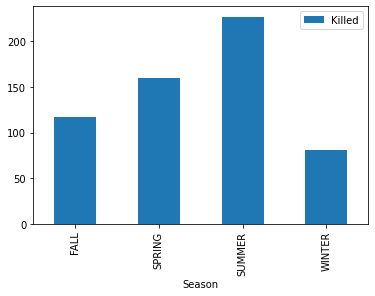

In [44]:
%matplotlib inline
graph = relevant_data_v7.groupby(['Season']).agg({"Killed":"count"}).plot.bar()
display(graph)

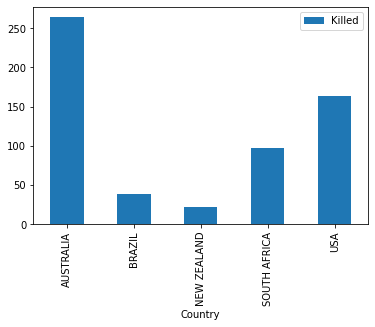

In [45]:
%matplotlib inline
graph = relevant_data_v7.groupby(['Country']).agg({"Killed":"count"}).plot.bar()
display(graph)

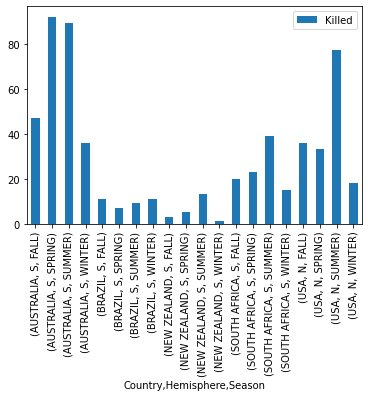

In [46]:
%matplotlib inline
graph = relevant_data_v7.groupby(['Country','Hemisphere','Season']).agg({"Killed":"count"}).plot.bar()
display(graph)

# WE CRATE AND EXPORT THE FINAL DATASET

In [47]:
#relevant_data_v6[['Month','Year','Country','Fatal (Y/N)','Hemisphere','Season']].to_csv("final_dataset.csv")